In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, precision_recall_curve, average_precision_score
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

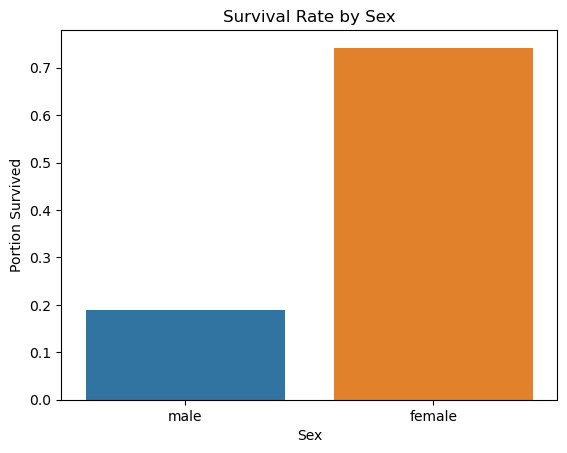

In [2]:
sns.barplot(x = 'Sex', y = 'Survived', errorbar = None, data = train)
plt.title('Survival Rate by Sex')
plt.ylabel('Portion Survived')
plt.show()

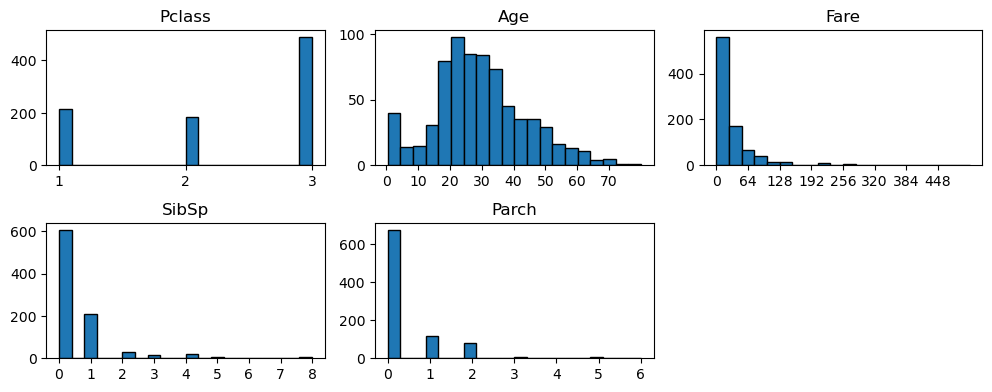

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [3]:
train_num = train[['Pclass', 'Age', 'Fare', 'SibSp', 'Parch']]

rows = (len(train_num.columns) + 2) // 3

fig, axes = plt.subplots(rows, 3, figsize=(10, 4))
axes = axes.flatten()

for i, col in enumerate(train_num):
    ax = axes[i]
    ax.hist(train[col], bins = 20, edgecolor = 'black')
    ax.set_title(train_num.columns[i])
    maximum = int(max(train[col]))
    minimum = int(min(train[col]))
    if (maximum>20):
        ax.set_xticks(range(0, maximum, maximum// 8))
    else:
        ax.set_xticks(range(minimum, maximum+1, 1))
    
for i in range(len(train_num.columns), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout(pad=1.0)    
plt.show()
print(test.head())

In [4]:
print(test[test['Fare'].isnull()])

     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  


In [5]:
test['Fare'].fillna(test[test['Pclass']==3]['Fare'].mean(), inplace = True)
print(test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [6]:
def cleaning (df):
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
    
    
    df['Sex'] = df['Sex'].map({'male':1, 'female': 0})
    df['Embarked'] = df['Embarked'].map({'S':0, 'C': 1, 'Q': 2})
    
    df.drop(columns = ['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace = True)
    
    return df
    
train = cleaning(train)
test = cleaning(test)


In [7]:
knn_imput = KNNImputer(n_neighbors = 4)
test['Age'] = knn_imput.fit_transform(test[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked']])
train['Age'] = knn_imput.fit_transform(train[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked']]) 
print(test.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  34.5      0      0   7.8292         2
1       3    0  47.0      1      0   7.0000         0
2       2    1  62.0      0      0   9.6875         2
3       3    1  27.0      0      0   8.6625         0
4       3    0  22.0      1      1  12.2875         0


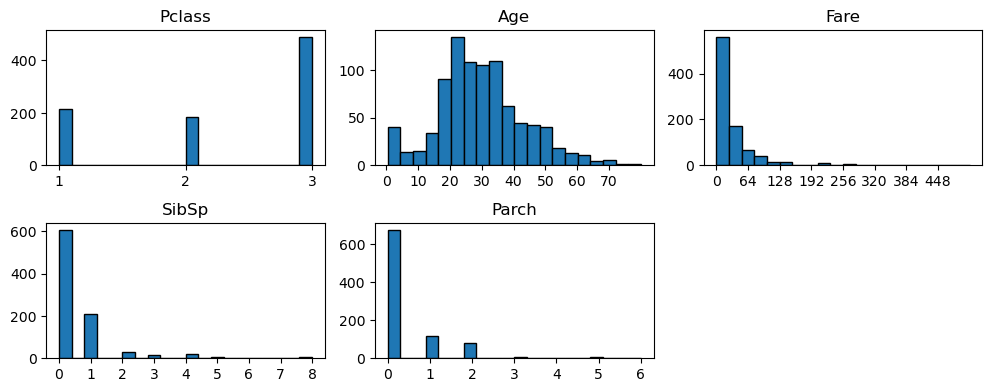

In [8]:
train_num = train[['Pclass', 'Age', 'Fare', 'SibSp', 'Parch']]

rows = (len(train_num.columns) + 2) // 3

fig, axes = plt.subplots(rows, 3, figsize=(10, 4))
axes = axes.flatten()

for i, col in enumerate(train_num):
    ax = axes[i]
    ax.hist(train[col], bins = 20, edgecolor = 'black')
    ax.set_title(train_num.columns[i])
    maximum = int(max(train[col]))
    minimum = int(min(train[col]))
    if (maximum>20):
        ax.set_xticks(range(0, maximum, maximum// 8))
    else:
        ax.set_xticks(range(minimum, maximum+1, 1))
    
for i in range(len(train_num.columns), len(axes)):
    fig.delaxes(axes[i])
    
plt.tight_layout(pad=1.0)    
plt.show()

In [9]:
def engineering (df): 
    df['Family Size'] = df['SibSp'] + df['Parch'] + 1
    
    df['Age Group'] = pd.cut(df['Age'], bins = [0, 12, 21, 40, 60, 110], labels = ['Child', 'Young Adult', 'Adult', 'Middle Age', 'Elder'])
    
    return df

trian = engineering(train)
test = engineering(test)

print(train.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Family Size  \
0         0       3    1  22.0      1      0   7.2500         0            2   
1         1       1    0  38.0      1      0  71.2833         1            2   
2         1       3    0  26.0      0      0   7.9250         0            1   
3         1       1    0  35.0      1      0  53.1000         0            2   
4         0       3    1  35.0      0      0   8.0500         0            1   

  Age Group  
0     Adult  
1     Adult  
2     Adult  
3     Adult  
4     Adult  


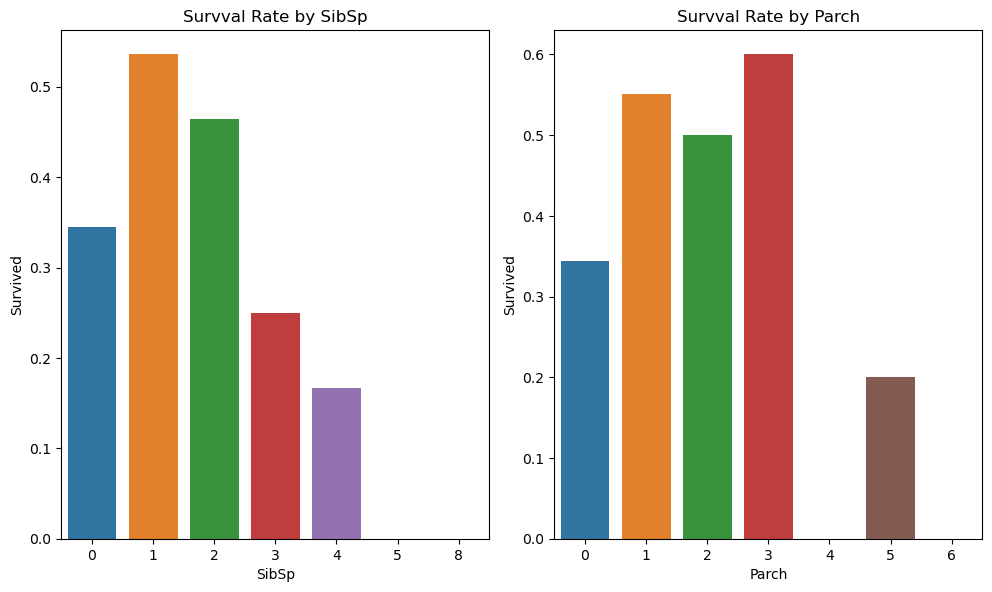

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes = axes.flatten()
two = ['SibSp', 'Parch']

for i in range(2):
    ax = axes[i]
    sns.barplot(ax = ax, x = two[i], y = 'Survived', data = train, errorbar= None)
    ax.set(title = ('Survval Rate by ' + two[i]))

plt.tight_layout(pad = 1.0)
plt.show()
    

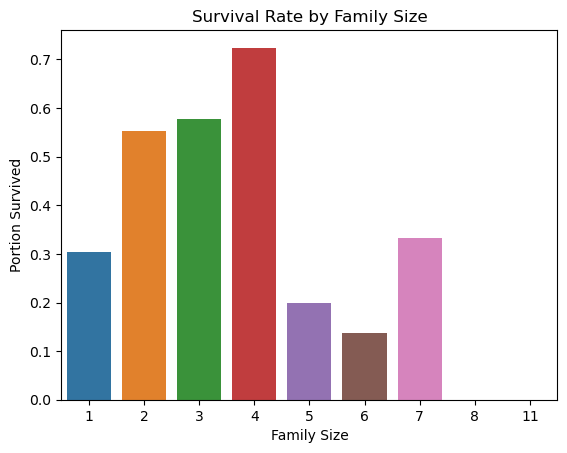

In [11]:
sns.barplot(x = 'Family Size', y = 'Survived', errorbar = None, data = train)
plt.title('Survival Rate by Family Size')
plt.ylabel('Portion Survived')
plt.show()

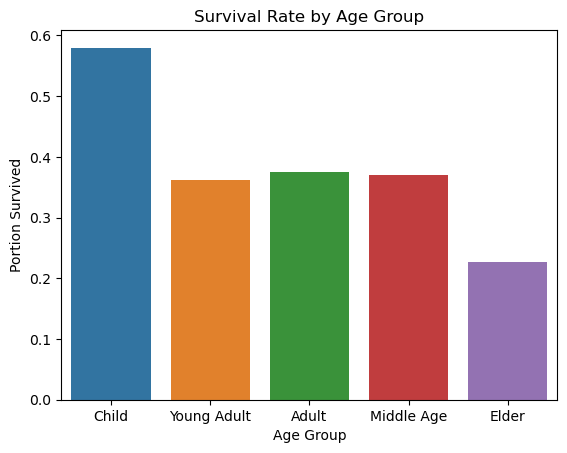

In [12]:
sns.barplot(x = 'Age Group', y = 'Survived', errorbar = None, data = train)
plt.title('Survival Rate by Age Group')
plt.ylabel('Portion Survived')
plt.show()


train['Age Group'] = train['Age Group'].map({'Child': 0, 'Young Adult': 1, 'Adult': 2, 'Middle Age': 3, 'Elder': 4})
test['Age Group'] = test['Age Group'].map({'Child': 0, 'Young Adult': 1, 'Adult': 2, 'Middle Age': 3, 'Elder': 4})

In [16]:
X = train.drop(columns = 'Survived')

Y = train['Survived']

In [17]:
scaler = StandardScaler()
X[['Age', 'Fare', 'SibSp', 'Parch', 'Family Size']] = scaler.fit_transform(X[['Age', 'Fare', 'SibSp', 'Parch', 'Family Size']])

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)

In [22]:
models ={
    'SVM' : SVC(),
    'Logistic Regression' : LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN' : KNeighborsClassifier()
}
results ={
    'Model' : [],
    'Accuracy' : [],
    'Precision' : []
}



for model_name, model in models.items():
    
    model.fit(X_train, Y_train)
    
    Y_prediction = model.predict(X_test)
    
    accuracy = accuracy_score(Y_test, Y_prediction)
    
    precision = precision_score(Y_test, Y_prediction)
    
    results['Model'].append(model_name)
    
    results['Accuracy'].append(accuracy)
    
    results['Precision'].append(precision)

results = pd.DataFrame(results)

print(results)

                 Model  Accuracy  Precision
0                  SVM  0.822222   0.846154
1  Logistic Regression  0.777778   0.750000
2        Random Forest  0.855556   0.888889
3                  KNN  0.822222   0.821429
